In [35]:
import pandas as pd
import matplotlib.pyplot as plt

fuel = pd.read_csv("data/fuel.csv", sep=";")[:-1]
fuel = fuel.replace(',','.', regex = True)
fuel[["Benzine","Diesel","LPG"]] = fuel[["Benzine", "Diesel","LPG"]].map(lambda x: float(x))

old_fuel = pd.read_csv("data/old_fuel.csv", sep=";")
old_fuel.rename(columns = {"Dieselolie (euro/100 liter)": "Diesel"}, inplace = True)
old_fuel["Diesel"] = old_fuel["Diesel"].map(lambda x: float(x)/100)
old_fuel.tail()


,Perioden,Diesel
25,2005,1.0240
26,2006,1.0872
27,2007,1.0980
28,2008,1.2865
29,2009,0.9990


In [36]:
dates = [date.split(sep= " ") for date in fuel["Perioden"]]
fuel["Jaar"] = [date[0] for date in dates]

dct = {"januari": 1, "februari": 2, "maart": 3, "april": 4, "mei": 5, "juni": 6,\
        "juli":7, "augustus": 8, "september":9, "oktober":10, "november":11, "december":12}
fuel["Maand"] = [dct[date[-1]] for date in dates]
fuel["Kwartaal"] = [1+(maand-1)//3 for maand in fuel["Maand"]]
fuel.head()

print("Any empty values:", fuel.isna().any(), sep="\n")
print(fuel.head())

Any empty values:
Perioden    False
Benzine     False
Diesel      False
LPG         False
Jaar        False
Maand       False
Kwartaal    False
dtype: bool
                   Perioden  Benzine  Diesel    LPG  Jaar  Maand  Kwartaal
0     2006 zondag 1 januari    1.325   1.003  0.543  2006      1         1
1    2006 maandag 2 januari    1.328   1.007  0.542  2006      1         1
2    2006 dinsdag 3 januari    1.332   1.007  0.540  2006      1         1
3   2006 woensdag 4 januari    1.348   1.020  0.550  2006      1         1
4  2006 donderdag 5 januari    1.347   1.021  0.550  2006      1         1


Jaar
2006    1.043211
2007    1.059721
2008    1.241314
2009    1.012929
Name: Diesel, dtype: float64
    Perioden  Diesel
25      2005  1.0240
26      2006  1.0872
27      2007  1.0980
28      2008  1.2865
29      2009  0.9990


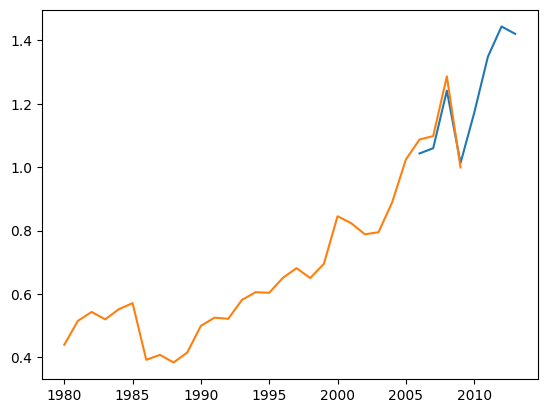

In [58]:
years2 = fuel.groupby(["Jaar"])
print(years2["Diesel"].mean()[:4])
print(old_fuel[-5:])

#meandata = years2.mean() 
plt.plot(range(2006, 2014), years2["Diesel"].mean()[:8])
plt.plot(old_fuel["Perioden"], old_fuel["Diesel"])

In [ ]:
fuel.tail()

,Perioden,Benzine,Diesel,LPG,Jaar,Maand,Kwartaal
6479,2023 donderdag 28 september,2.114,1.938,0.797,2023,9,3
6480,2023 vrijdag 29 september,2.112,1.936,0.799,2023,9,3
6481,2023 zaterdag 30 september,2.102,1.932,0.798,2023,9,3
6482,2023 zondag 1 oktober,2.104,1.933,0.794,2023,10,4
6483,2023 maandag 2 oktober,2.104,1.936,0.809,2023,10,4
